# cycleGAN

In [111]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display # to display images
from multiprocessing import Process
import histogram as htg
import aHash as ah
import pHash as ph
import dHash as dh
from glob import glob

#opens images:
target = glob("./cycleGAN/target/*.jpg") # target only one
compare_list = glob("./cycleGAN/compare/ep*.png")
# print("find file: {}".format(target))

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))


# 依据图片直方图距离计算相似度
histogram_list = []

# 平均哈希算法计算相似度
aHash_list = []

# 感知哈希算法计算相似度
pHash_list = []

# 差异哈希算法计算相似度
dHash_list = []

# plt
data_h_list = []
data_a_list = []
data_p_list = []
data_d_list = []

# read image files
img_target = Image.open(target[0])
img1 = img_target
img1_htg = htg.regularizeImage(img1)
hg1 = img1_htg.histogram()

for idx, img_location in enumerate(compare_list):
    if idx % 10 == 0 :
        print("finish: [{}/{}]".format(idx, len(compare_list)))
    
#     if idx == 50 :
#         break
    
    img_compare = Image.open(img_location)
    
    
    img2 = img_compare

#     display(img1)
#     display(img2)


    #     print('img1_shape = {}'.format(img1.shape))
    #     print('img2_shape = {}'.format(img2.shape))

    # Histogram Similarity Calculation
    # regularize the images
    
    img2_htg = htg.regularizeImage(img2)

    
    #     print(hg1)
    # print(img1.histogram())
#     print('img1的样本点有{}个'.format(len(hg1)))
    hg2 = img2_htg.histogram()
    #     print(hg2)
    # print(img2.histogram())
#     print('img2的样本点有{}个'.format(len(hg2)))

    # draw the histogram in a no-blocking way
    sub_thread = Process(target=htg.drawHistogram, args=(hg1, hg2,))
    sub_thread.start()


    percentage = 64

    # print the histogram similarity
#     print('依据图片直方图距离计算相似度：{}'.format(htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)))
    his_result = htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)
    histogram_list.append(his_result)
    data_h_list.append((idx, his_result))
    
    # aHash Calculation
#     print('依据平均哈希算法计算相似度：{}/{}'.format(ah.calaHashSimilarity(img1, img2), percentage))
    ahash_result = ah.calaHashSimilarity(img1, img2)/64
    aHash_list.append(ahash_result)
    data_a_list.append((idx, ahash_result))
    
    # pHash Calculation
#     print('依据感知哈希算法计算相似度：{}/{}'.format(ph.calpHashSimilarity(img1, img2), percentage))
    phash_result = ph.calpHashSimilarity(img1, img2)/64
    pHash_list.append(phash_result)
    data_p_list.append((idx, phash_result))
    
    # dHash Calculation
#     print('依据差异哈希算法计算相似度：{}/{}'.format(dh.caldHashSimilarity(img1, img2), percentage))
    dhash_result = dh.caldHashSimilarity(img1, img2)/64
    dHash_list.append(dhash_result)
    data_d_list.append((idx, dhash_result))
    
    
    


finish: [0/300]
finish: [1/300]
finish: [2/300]
finish: [3/300]
finish: [4/300]
finish: [5/300]
finish: [6/300]
finish: [7/300]
finish: [8/300]
finish: [9/300]
finish: [10/300]
finish: [11/300]
finish: [12/300]
finish: [13/300]
finish: [14/300]
finish: [15/300]
finish: [16/300]
finish: [17/300]
finish: [18/300]
finish: [19/300]
finish: [20/300]
finish: [21/300]
finish: [22/300]
finish: [23/300]
finish: [24/300]
finish: [25/300]
finish: [26/300]
finish: [27/300]
finish: [28/300]
finish: [29/300]
finish: [30/300]
finish: [31/300]
finish: [32/300]
finish: [33/300]
finish: [34/300]
finish: [35/300]
finish: [36/300]
finish: [37/300]
finish: [38/300]
finish: [39/300]
finish: [40/300]
finish: [41/300]
finish: [42/300]
finish: [43/300]
finish: [44/300]
finish: [45/300]
finish: [46/300]
finish: [47/300]
finish: [48/300]
finish: [49/300]
finish: [50/300]
finish: [51/300]
finish: [52/300]
finish: [53/300]
finish: [54/300]
finish: [55/300]
finish: [56/300]
finish: [57/300]
finish: [58/300]
finish:

In [34]:
# Importing the statistics module 
import statistics 
  
# # list of positive integer numbers 
# data1 = [1, 3, 4, 5, 7, 9, 2] 
  
# x = statistics.mean(data1) 

print("histogram_list mean is :", statistics.mean(histogram_list))
print("aHash_list mean is :", statistics.mean(aHash_list))
print("pHash_list mean is :", statistics.mean(pHash_list))
print("dHash_list mean is :", statistics.mean(dHash_list))
  
# Printing the mean 
# print("Mean is :", x) 

histogram_list mean is : 0.41685103972657245
aHash_list mean is : 0.79046875
pHash_list mean is : 0.9494791666666667
dHash_list mean is : 0.725625


In [35]:
import matplotlib.pyplot as plt

def plotData(plt, data):
    x = [p[0] for p in data]
    y = [p[1] for p in data]
    plt.plot(x, y, '-o')

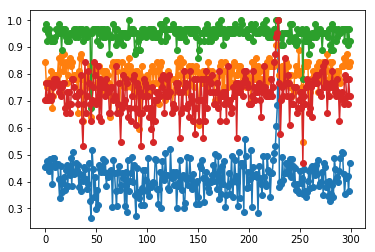

In [36]:
plotData(plt, data_h_list)
plotData(plt, data_a_list)
plotData(plt, data_p_list)
plotData(plt, data_d_list)
# plt.legend()
plt.show()

# cycle coopnet

In [37]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display # to display images
from multiprocessing import Process
import histogram as htg
import aHash as ah
import pHash as ph
import dHash as dh
from glob import glob

#opens images:
target = glob("./cyclecoopnet/target/ep*.png") # target only one
compare_list = glob("./cyclecoopnet/compare/ep*.png")
# print("find file: {}".format(target))

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))


# 依据图片直方图距离计算相似度
histogram_list = []

# 平均哈希算法计算相似度
aHash_list = []

# 感知哈希算法计算相似度
pHash_list = []

# 差异哈希算法计算相似度
dHash_list = []

# plt
data_h_list = []
data_a_list = []
data_p_list = []
data_d_list = []

# read image files
img_target = Image.open(target[0])
img1 = img_target
img1_htg = htg.regularizeImage(img1)
hg1 = img1_htg.histogram()

for idx, img_location in enumerate(compare_list):
    print("finish: [{}/{}]".format(idx, len(compare_list)))
    
#     if idx == 50 :
#         break
    
    img_compare = Image.open(img_location)
    
    
    img2 = img_compare

#     display(img1)
#     display(img2)


    #     print('img1_shape = {}'.format(img1.shape))
    #     print('img2_shape = {}'.format(img2.shape))

    # Histogram Similarity Calculation
    # regularize the images
    
    img2_htg = htg.regularizeImage(img2)

    
    #     print(hg1)
    # print(img1.histogram())
#     print('img1的样本点有{}个'.format(len(hg1)))
    hg2 = img2_htg.histogram()
    #     print(hg2)
    # print(img2.histogram())
#     print('img2的样本点有{}个'.format(len(hg2)))

    # draw the histogram in a no-blocking way
    sub_thread = Process(target=htg.drawHistogram, args=(hg1, hg2,))
    sub_thread.start()


    percentage = 64

    # print the histogram similarity
#     print('依据图片直方图距离计算相似度：{}'.format(htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)))
    his_result = htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)
    histogram_list.append(his_result)
    data_h_list.append((idx, his_result))
    
    # aHash Calculation
#     print('依据平均哈希算法计算相似度：{}/{}'.format(ah.calaHashSimilarity(img1, img2), percentage))
    ahash_result = ah.calaHashSimilarity(img1, img2)/64
    aHash_list.append(ahash_result)
    data_a_list.append((idx, ahash_result))
    
    # pHash Calculation
#     print('依据感知哈希算法计算相似度：{}/{}'.format(ph.calpHashSimilarity(img1, img2), percentage))
    phash_result = ph.calpHashSimilarity(img1, img2)/64
    pHash_list.append(phash_result)
    data_p_list.append((idx, phash_result))
    
    # dHash Calculation
#     print('依据差异哈希算法计算相似度：{}/{}'.format(dh.caldHashSimilarity(img1, img2), percentage))
    dhash_result = dh.caldHashSimilarity(img1, img2)/64
    dHash_list.append(dhash_result)
    data_d_list.append((idx, dhash_result))
    
    
    


finish: [0/300]
finish: [1/300]
finish: [2/300]
finish: [3/300]
finish: [4/300]
finish: [5/300]
finish: [6/300]
finish: [7/300]
finish: [8/300]
finish: [9/300]
finish: [10/300]
finish: [11/300]
finish: [12/300]
finish: [13/300]
finish: [14/300]
finish: [15/300]
finish: [16/300]
finish: [17/300]
finish: [18/300]
finish: [19/300]
finish: [20/300]
finish: [21/300]
finish: [22/300]
finish: [23/300]
finish: [24/300]
finish: [25/300]
finish: [26/300]
finish: [27/300]
finish: [28/300]
finish: [29/300]
finish: [30/300]
finish: [31/300]
finish: [32/300]
finish: [33/300]
finish: [34/300]
finish: [35/300]
finish: [36/300]
finish: [37/300]
finish: [38/300]
finish: [39/300]
finish: [40/300]
finish: [41/300]
finish: [42/300]
finish: [43/300]
finish: [44/300]
finish: [45/300]
finish: [46/300]
finish: [47/300]
finish: [48/300]
finish: [49/300]
finish: [50/300]
finish: [51/300]
finish: [52/300]
finish: [53/300]
finish: [54/300]
finish: [55/300]
finish: [56/300]
finish: [57/300]
finish: [58/300]
finish:

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def plotData(plt, data):
    x = [p[0] for p in data]
    y = [p[1] for p in data]
#     plt.plot(2, 3, '-o')
#     plt.plot(4, 5, '-o')
    plt.plot(x, y, '-o')

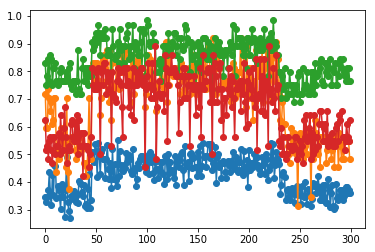

In [80]:
plotData(plt, data_h_list)
plotData(plt, data_a_list)
plotData(plt, data_p_list)
plotData(plt, data_d_list)



# sma5 = talib.SMA(close, timeperiod = 5) 
# ax1.plot(dates,sma5)

# plt.legend()
# plt.legend('data_h_list', 'data_a_list', 'data_p_list','data_d_list') 
# plt.grid(True)

# z0 = np.polyfit(labels,data[0],1)# （x,y,power）最小二乘法多项式拟合，1表示一次拟合
# p = np.poly1d(z0)# 变量转换 不懂
# plt.plot(labels, p(labels),'orange',ls='--')# plot(x,y,color,linestyle)
# plt.figure(figsize=(20,10))
plt.show()

In [109]:
def trend_line(data):
    y_list = []
    return_list = []

    for idx, p in enumerate(data_a_list):
    #     print(idx)
        y_list.append(p[1])

        if idx % 10 == 0:
            return_list.append((idx/2, np.mean(y_list)))
            y_list = []
            
#     print(return_list)
    return return_list
            

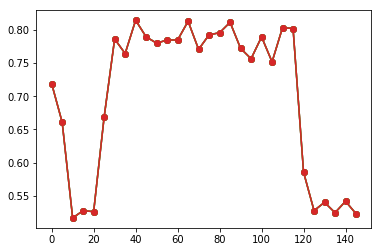

In [110]:
# data_h_list = trend_line(data_h_list)
# print(data_h_list)

return_list = trend_line(data_h_list)
plotData(plt, return_list)

return_list = trend_line(data_a_list)
plotData(plt, return_list)

return_list = trend_line(data_p_list)
plotData(plt, return_list)

return_list = trend_line(data_d_list)
plotData(plt, return_list)
        
        
    
# plotData(plt, data_a_list)
# plotData(plt, data_p_list)
# plotData(plt, data_d_list)

# sma5 = talib.SMA(close, timeperiod = 5) 
# ax1.plot(dates,sma5)

# plt.legend()
# plt.legend('data_h_list', 'data_a_list', 'data_p_list','data_d_list') 
# plt.grid(True)

# z0 = np.polyfit(labels,data[0],1)# （x,y,power）最小二乘法多项式拟合，1表示一次拟合
# p = np.poly1d(z0)# 变量转换 不懂
# plt.plot(labels, p(labels),'orange',ls='--')# plot(x,y,color,linestyle)
# plt.figure(figsize=(20,10))
plt.show()